In [47]:
import numpy as np, matplotlib.pyplot as plt
L = 40
N = L * L
q = 20
x = np.array([-x for x in range(2 * L * L + 1)])

In [2]:
e = {}
with open(".//datasets//fugao_L40_run1e.txt", 'r') as f:
    for line in f:
        sub_data = list(map(int, line.split()))
        e[sub_data[0]] = sub_data[1:]
lng = {}
with open(".//datasets//fugao_L40_run1lng.txt", 'r') as f:
    for line in f:
        sub_data = list(map(float, line.split()))
        lng[sub_data[0]] = sub_data[1:]

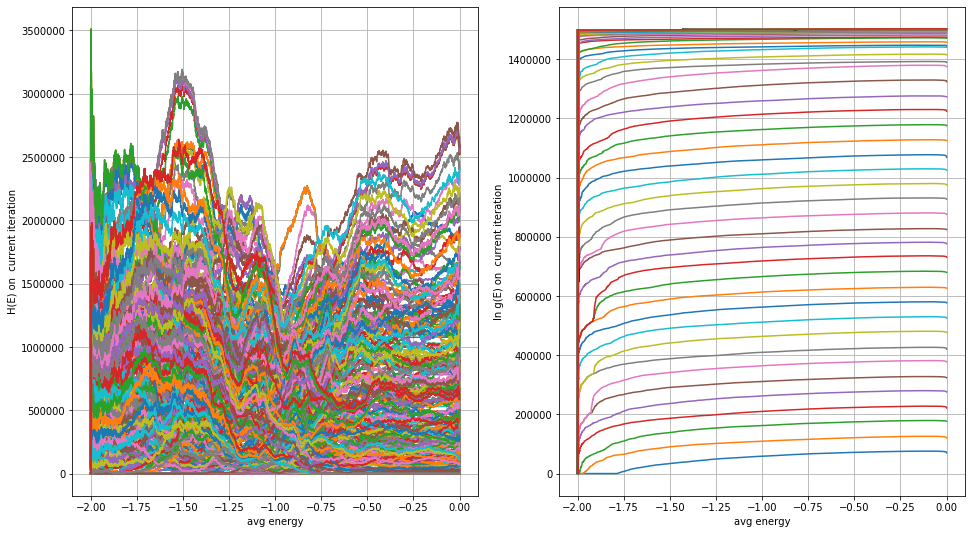

In [3]:
plt.figure(figsize=(16, 9))
plt.subplot(121)
for steps in e.keys():
    plt.plot(x / L / L, e[steps], label=steps)
plt.xlabel("avg energy")
plt.ylabel("H(E) on  current iteration")
#plt.legend()
plt.grid()
#plt.yscale("log")

plt.subplot(122)
for steps in lng.keys():
    plt.plot(x / L / L, lng[steps], label=steps)
plt.xlabel("avg energy")
plt.ylabel("ln g(E) on  current iteration")
#plt.legend()
plt.grid()
#plt.yscale("log")

plt.show()

step 45400000.0


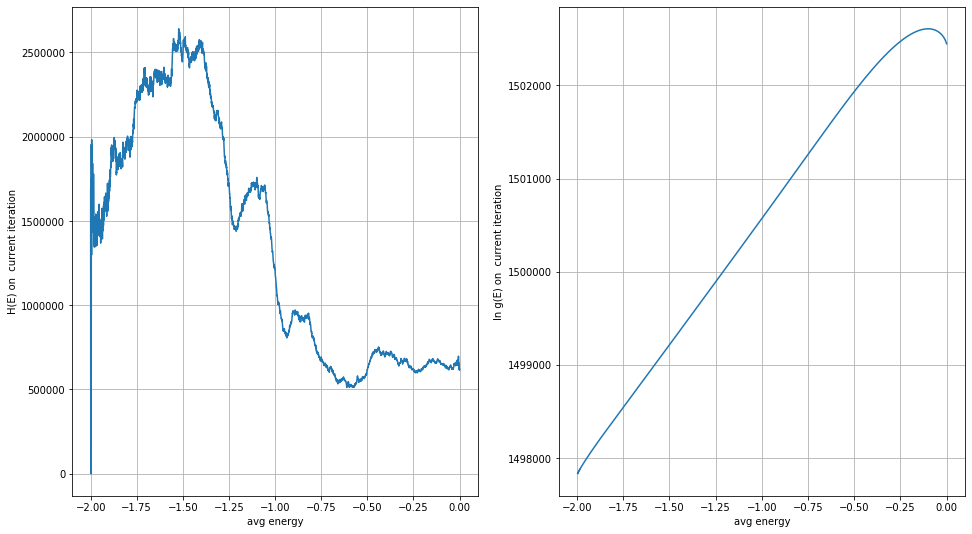

In [4]:
plt.figure(figsize=(16, 9))
plt.subplot(121)
steps = max(e.keys())
plt.plot(x / L / L, e[steps], label=steps)
plt.xlabel("avg energy")
plt.ylabel("H(E) on  current iteration")
#plt.legend()
plt.grid()

plt.subplot(122)
steps = max(lng.keys())
plt.plot(x[:-6] / L / L, lng[steps][:-6], label=steps)
plt.xlabel("avg energy")
plt.ylabel("ln g(E) on  current iteration")
#plt.legend()
plt.grid()

print("step {}".format(steps))
plt.show()

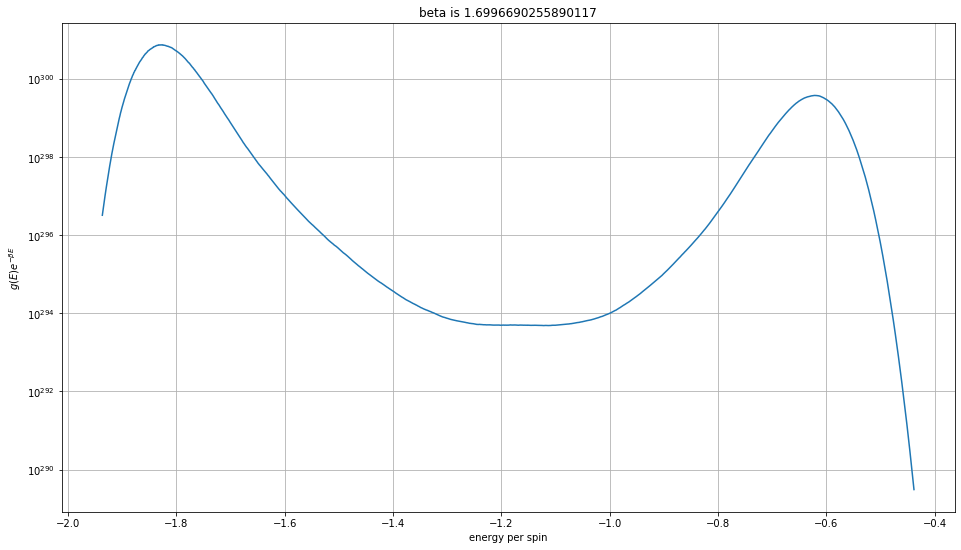

In [101]:
S = [(lnge, E) for lnge, E in zip(lng[steps], x) if lnge != 1.0]
delta = S[-1][0] - (1 - N) * np.log(20)

beta = np.log(1 + np.sqrt(q))
def limits(E, lnge):
    return (E < -700) and (E > -3100)
plt.figure(figsize=(16, 9))
plt.plot([E / N for lnge, E in S if limits(E, lnge)], [np.exp((lnge - delta) - beta * E) for lnge, E in S if limits(E, lnge)])
plt.yscale("log")
plt.title("beta is {}".format(beta))
plt.ylabel(r"$g(E)e^{-\beta E}$")
plt.xlabel("energy per spin")
plt.grid()
plt.show()

In [73]:
normed = np.array([lnge - delta for lnge, E in S])
sum(np.exp(normed)) # should be 1

1.027884228291162

In [102]:
max([np.exp((lnge - delta) - beta * E) for lnge, E in S if limits(E, lnge)])

7.418638023028788e+300

In [103]:
max([np.exp((lnge - delta) - beta * E) for lnge, E in S if limits(E, lnge) and E > -1000])

3.758192851542734e+299

In [104]:
max([np.exp((lnge - delta) - beta * E) for lnge, E in S if limits(E, lnge)]) / max([np.exp((lnge - delta) - beta * E) for lnge, E in S if limits(E, lnge) and E > -1000])

19.739907759080126